## <font size=5> <strong>Heart Disease Prediction By Ananya Pillai
 

## I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.Rhistory', 'Untitled7.ipynb', '.config', 'Music', '.zprofile.pysave', '.condarc', 'venv-metal', 'Untitled5.ipynb', 'Untitled1.ipynb', '.vim', '.th-client', '.DS_Store', 'nltk_data', 'BTECH IT PYTHON.ipynb', '.CFUserTextEncoding', 'Diabetes.ipynb', 'matlab_crash_dump.908-1', '.xonshrc', '.bash_profile.save', 'Untitled3.ipynb', '.netrc', 'Untitled.ipynb', '.zshrc', '.swp', '.packettracer', 'HyperGeometric.R', '.arduinoIDE', 'Untitled4.ipynb', '.streamlit', '.local', 'Untitled6.ipynb', '.mongodb', 'Pictures', '.zprofile', 'heart.csv', 'node_modules', 'Postman', 'Project_LogisticRegression.ipynb', '.zsh_history', 'Untitled2.ipynb', '.ipython', 'Desktop', 'Library', 'SOFTWARE PROJECT.ipynb', '.matplotlib', '.lesshst', 'Music2', '.oracle_jre_usage', '.emulator_console_auth_token', '.spyder-py3', '.node_repl_history', '.android', 'scikit_learn_data', 'PYTHON SKILLS.ipynb', 'untitled.txt', 'Heart_disease_prediction.ipynb', 'exam.csv.xlsx', 'PycharmProjects', 'Public', '.hyper_plugins', 'a.t

## II. Importing and understanding our dataset 

In [64]:
dataset = pd.read_csv("heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [65]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [66]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [67]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [68]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2,1
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3,0
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2,0
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2,1


#### Description

In [69]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [71]:
###Luckily, we have no missing values

#### Let's understand our columns better:

In [72]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [73]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [74]:
dataset["target"].unique()

array([1, 0])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [75]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [76]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

1    165
0    138
Name: target, dtype: int64


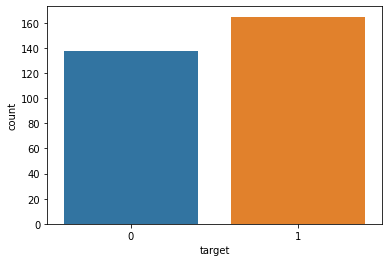

In [77]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [78]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [79]:
dataset["sex"].unique()

array([1, 0])

##### We notice, that as expected, the 'sex' feature has 2 unique features

<AxesSubplot:xlabel='sex', ylabel='target'>

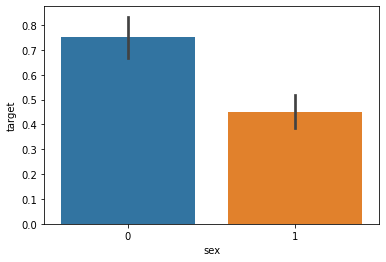

In [80]:
sns.barplot(dataset["sex"],y)

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [81]:
dataset["cp"].unique()

array([3, 2, 1, 0])

##### As expected, the CP feature has values from 0 to 3

<AxesSubplot:xlabel='cp', ylabel='target'>

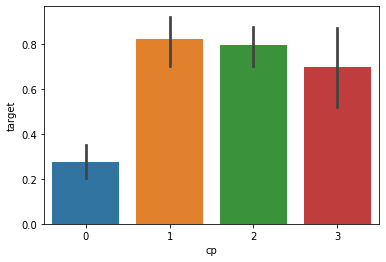

In [82]:
sns.barplot(dataset["cp"],y)

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [83]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [84]:
dataset["fbs"].unique()

array([1, 0])

<AxesSubplot:xlabel='fbs', ylabel='target'>

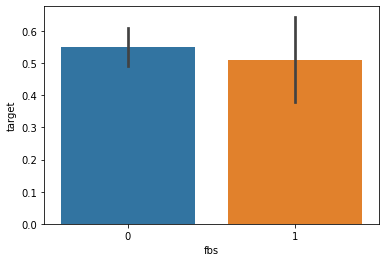

In [85]:
sns.barplot(dataset["fbs"],y)

##### Nothing extraordinary here

### Analysing the restecg feature

In [86]:
dataset["restecg"].unique()

array([0, 1, 2])

<AxesSubplot:xlabel='restecg', ylabel='target'>

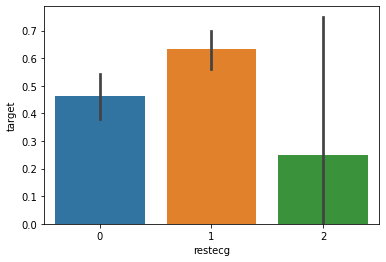

In [87]:
sns.barplot(dataset["restecg"],y)

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [88]:
dataset["exang"].unique()

array([0, 1])

<AxesSubplot:xlabel='exang', ylabel='target'>

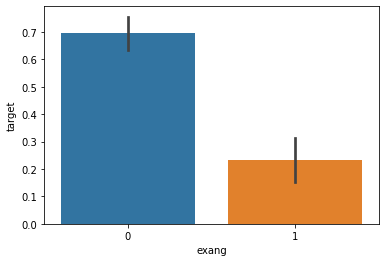

In [89]:
sns.barplot(dataset["exang"],y)

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [90]:
dataset["slope"].unique()

array([0, 2, 1])

<AxesSubplot:xlabel='slope', ylabel='target'>

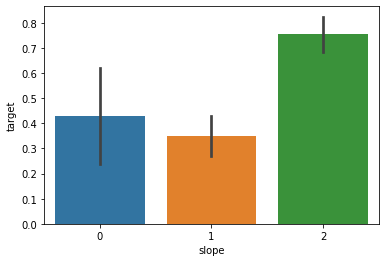

In [91]:
sns.barplot(dataset["slope"],y)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [92]:
#number of major vessels (0-3) colored by flourosopy

In [93]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

<AxesSubplot:xlabel='ca', ylabel='count'>

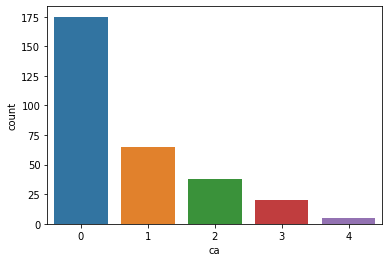

In [94]:
sns.countplot(dataset["ca"])

<AxesSubplot:xlabel='ca', ylabel='target'>

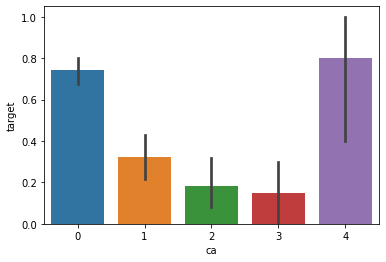

In [95]:
sns.barplot(dataset["ca"],y)

##### ca=4 has astonishingly large number of heart patients

In [96]:
### Analysing the 'thal' feature

In [97]:
dataset["thal"].unique()

array([1, 2, 3, 0])

<AxesSubplot:xlabel='thal', ylabel='target'>

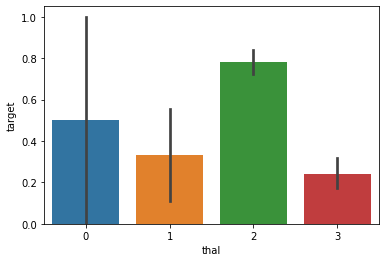

In [98]:
sns.barplot(dataset["thal"],y)

<AxesSubplot:xlabel='thal', ylabel='Density'>

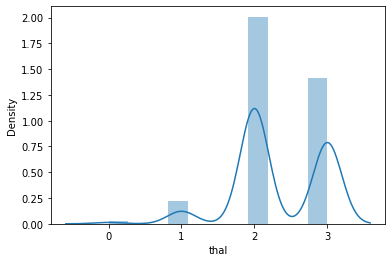

In [99]:
sns.distplot(dataset["thal"])

## IV. Train Test split

In [100]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [101]:
X_train.shape

(242, 13)

In [102]:
X_test.shape

(61, 13)

In [103]:
Y_train.shape

(242,)

In [104]:
Y_test.shape

(61,)

## V. Model Fitting

In [105]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

### Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [107]:
Y_pred_lr.shape

(61,)

In [108]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
precision_lr = round(precision_score(Y_test, Y_pred_lr, average='weighted') * 100, 2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")
print("The Precision Score is:  " + str(precision_lr)+"%")

The accuracy score achieved using Logistic Regression is: 85.25 %
The Precision Score is:  85.23%


### Naive Bayes

In [109]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [110]:
Y_pred_nb.shape

(61,)

In [111]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


### SVM

In [112]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [113]:
Y_pred_svm.shape

(61,)

In [114]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


### K Nearest Neighbors

In [115]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [116]:
Y_pred_knn.shape

(61,)

In [117]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


### Decision Tree

In [118]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [119]:
print(Y_pred_dt.shape)

(61,)


In [120]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


### Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [122]:
Y_pred_rf.shape

(61,)

In [123]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


### XGBoost

In [27]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target", axis=1)
target = dataset["target"]

X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)


In [28]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)




In [29]:
Y_pred_xgb.shape

(61,)

In [30]:
from sklearn.metrics import accuracy_score

score_xgb = round(accuracy_score(Y_pred_xgb, Y_test) * 100, 2)
print("The accuracy score achieved using XGBoost is: " + str(score_xgb) + " %")


The accuracy score achieved using XGBoost is: 83.61 %


### Neural Network

In [31]:
from keras.models import Sequential
from keras.layers import Dense

In [32]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4708 - loss: 24.6912  
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4585 - loss: 22.3573 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.4373 - loss: 19.7583
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.4552 - loss: 16.2934
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4346 - loss: 14.0699 
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.4743 - loss: 9.8299
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.5103 - loss: 6.3594
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4713 - loss: 3.8461 
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.4863 - loss: 2.2333
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.5025 - loss: 2.4218
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.5498 - loss: 2.1870
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

In [34]:
Y_pred_nn = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [35]:
Y_pred_nn.shape

(61, 1)

In [36]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [37]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

The accuracy score achieved using Neural Network is: 78.69 %


## VI. Output final score

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train-Test Split (Assume X_train, X_test, Y_train, Y_test are already defined)

# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)
Y_pred_lr = model_lr.predict(X_test)

# Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, Y_train)
Y_pred_nb = model_nb.predict(X_test)

# Support Vector Machine
model_svm = SVC()
model_svm.fit(X_train, Y_train)
Y_pred_svm = model_svm.predict(X_test)

# K-Nearest Neighbors
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, Y_train)
Y_pred_knn = model_knn.predict(X_test)

# Decision Tree
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, Y_train)
Y_pred_dt = model_dt.predict(X_test)

# Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train, Y_train)
Y_pred_rf = model_rf.predict(X_test)

# XGBoost (Optional, if installed)
import xgboost as xgb
model_xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model_xgb.fit(X_train, Y_train)
Y_pred_xgb = model_xgb.predict(X_test)

# Compute Accuracy Scores
score_lr = round(accuracy_score(Y_pred_lr, Y_test) * 100, 2)
score_nb = round(accuracy_score(Y_pred_nb, Y_test) * 100, 2)
score_svm = round(accuracy_score(Y_pred_svm, Y_test) * 100, 2)
score_knn = round(accuracy_score(Y_pred_knn, Y_test) * 100, 2)
score_dt = round(accuracy_score(Y_pred_dt, Y_test) * 100, 2)
score_rf = round(accuracy_score(Y_pred_rf, Y_test) * 100, 2)
score_xgb = round(accuracy_score(Y_pred_xgb, Y_test) * 100, 2)

# Combine Results
scores = [score_lr, score_nb, score_svm, score_knn, score_dt, score_rf, score_xgb]
algorithms = ["Logistic Regression", "Naive Bayes", "Support Vector Machine", 
              "K-Nearest Neighbors", "Decision Tree", "Random Forest", "XGBoost"]

# Print Results
for i in range(len(algorithms)):
    print(f"The accuracy score achieved using {algorithms[i]} is: {scores[i]} %")


The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 68.85 %
The accuracy score achieved using K-Nearest Neighbors is: 63.93 %
The accuracy score achieved using Decision Tree is: 77.05 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 83.61 %


In [48]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize individual classifiers
model_lr = LogisticRegression()
model_nb = GaussianNB()
model_svm = SVC(probability=True)  # Set probability=True for VotingClassifier
model_knn = KNeighborsClassifier()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()

# Fusion Classifier using Voting
fusion_model = VotingClassifier(
    estimators=[
        ('Logistic Regression', model_lr),
        ('Naive Bayes', model_nb),
        ('Support Vector Machine', model_svm),
        ('K-Nearest Neighbors', model_knn),
        ('Decision Tree', model_dt),
        ('Random Forest', model_rf)
    ],
    voting='soft'  # Use 'hard' for majority voting or 'soft' for probability-based voting
)

# Train the Fusion Classifier
fusion_model.fit(X_train, Y_train)

# Generate predictions
Y_pred_fusion = fusion_model.predict(X_test)

# Compute accuracy score
score_fusion = round(accuracy_score(Y_pred_fusion, Y_test) * 100, 2)

# Print the result
print(f"The accuracy score achieved using the Fusion Classifier is: {score_fusion} %")


The accuracy score achieved using the Fusion Classifier is: 85.25 %


In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

### Hey Ananya there random forest has good result as compare to other algorithms <br> <br>

In [ ]:
sns.countplot(dataset["sex"])

In [ ]:
sns.countplot(dataset["cp"])

In [ ]:
sns.countplot(dataset["restecg"])

<Axes: ylabel='count'>

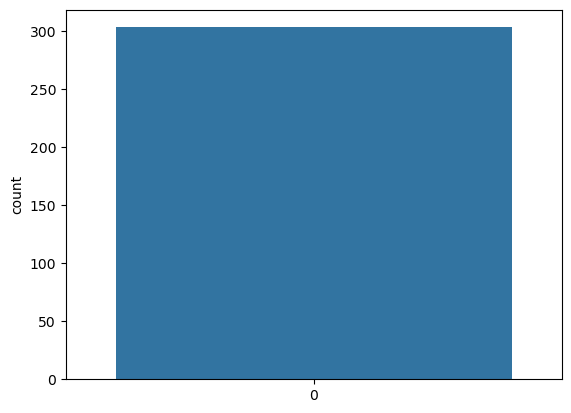

In [39]:
sns.countplot(dataset["chol"])

<Axes: ylabel='count'>

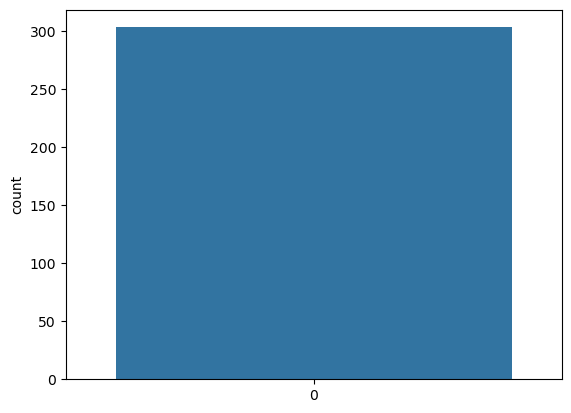

In [40]:
sns.countplot(dataset["slope"])

1    165
0    138
Name: target, dtype: int64


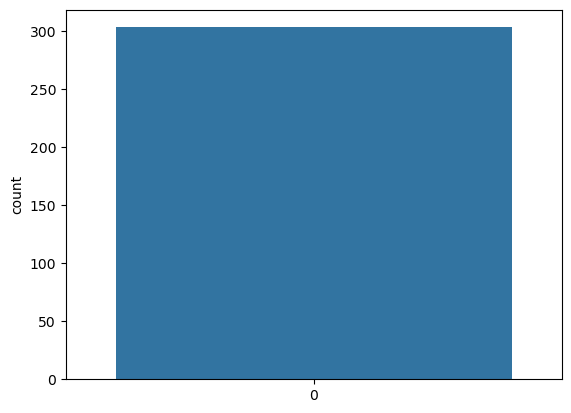

In [42]:
y = dataset["chol"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)